# PLANT  DISEASE CLASSIFICATION - ALEXNET




In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import models,transforms 
from torch.autograd import Variable

from dl4cv.classifiers.AlexNet_network import ClassificationNetwork
from dl4cv.data_utils import ClassificationData

torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Train and validation data

Download the dataset with the `datasets/get_segmentation_dataset.sh` script and make yourself familiar with it. Look at the labels described in `datasets/segmentation_data/info.html` and note the label `unlabeled`. Pixels with the label `unlabeled` should neither be considered in your loss nor the accuracy.

In [6]:
import os
dataset_folder = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop', 'datasets', 'train') 

train_data = ClassificationData(root=dataset_folder,
                              image_list='train.txt')

val_data = ClassificationData(root=dataset_folder,
                            image_list='val.txt')

test_data = ClassificationData(root=dataset_folder,
                            image_list='test.txt')

Train size: 17717
Validation size: 2100
Test size: 2100
Img size: torch.Size([3, 240, 240])
0
Apple Scab


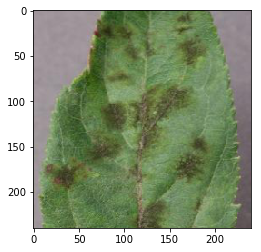

True


In [21]:
print("Train size: %i" % len(train_data))
print("Validation size: %i" % len(val_data))
print("Test size: %i" % len(test_data))

img, target_labels = train_data[1]
target, name = target_labels

print("Img size: " + str(img.size()))
print(target)
print(name)

plt.figure(figsize=(4,4))
plt.imshow(img.numpy().transpose(1,2,0))
plt.show()

use_gpu = torch.cuda.is_available()
print use_gpu

## Data Augmentation 

## Test Model

In [34]:
from dl4cv.classifiers.AlexNet_network import ClassificationNetwork
from torchvision import models
alex_model = models.alexnet(pretrained=True)
print alex_model

for param in alex_model.parameters():
    param.requires_grad = False
    
my_model = ClassificationNetwork()
for param in my_model.parameters():
    print param.requires_grad
    
img1 = torch.rand((3,3,240,240))
print type(img1)
inp = Variable(img1)
print type(inp)
print inp.size()
output1 = model_alex.forward(inp)
print output1.size()

output2 = my_model.forward(inp)
print output2.size()

AlexNet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Dropout (p = 0.5)
    (1): Linear (9216 -> 4096)
    (2): ReLU (inplace)
    (3): Dropout (p = 0.5)
    (4): Linear (4096 -> 4096)
    (5): ReLU (inplace)
    (6): Linear (4096 -> 1000)
  )
)
False
False
False
False
Fals

## Train your network
Implement your network architecture in `classifiers.segmentation_network.py` and adapt your `Solver` to process segmentation labels. Think about finetuning a model instead of training from scratch. If you are not equipped with a CUDA GPU test your model locally and then finish training on the computers in our lab.

In [ ]:
from dl4cv.classifiers.segmentation_network import SegmentationNetwork
from dl4cv.classifiers.solver import Solver

############################################################################
#                             YOUR CODE                                    #
############################################################################
train_loader = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False, num_workers=4)

model = SegmentationNetwork()
solver = Solver(optim_args={"lr": 1e-3, "weight_decay": 0.001})
solver.train(model, train_loader, val_loader, log_nth=10, num_epochs=1)


START TRAIN.


# Test your model
Since this dataset is very small we only provided you with a validation set.

In [ ]:
test_data = SegmentationData(root='datasets/segmentation_data', image_list='val.txt')
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=1)

test_scores = []
model.eval()
for batch in test_loader:
    inputs, labels = Variable(batch[0]), Variable(batch[1])

    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    labels_mask = labels >= 0
    #print(np.mean((preds == labels)[labels_mask].data.numpy()))
    test_scores.append(np.mean((preds == labels)[labels_mask].data.numpy()))
model.train()
test_acc = np.mean(test_scores)
print(test_acc)

## Save the model

When you are satisfied with your training, save the model for submission.

In [ ]:
model.save("models/segmentation_network.model")